In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.colors import ListedColormap
rcParams["figure.figsize"] = 10,5
%matplotlib inline

In [2]:
df = pd.read_csv("/home/darknurd/Downloads/Machine Learning/aman_self/heart_data.csv");

In [3]:
df.head()

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
0,70,1,4,130,322,0,2,109,0,24,2,3,3,2
1,67,0,3,115,564,0,2,160,0,16,2,0,7,1
2,57,1,2,124,261,0,0,141,0,3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,2,1,1,3,1


In [4]:
df.describe()

,Age,Sex,ChestPainType,RestBloodPressure,SerumCholestoral,FastingBloodSugar,ResElectrocardiographic,MaxHeartRate,ExerciseInduced,Oldpeak,Slope,MajorVessels,Thal,Class
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,8.900000,1.585185,0.670370,4.696296,1.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,11.003936,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,1.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,4.000000,2.000000,0.000000,3.000000,1.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,15.000000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,62.000000,3.000000,3.000000,7.000000,2.000000


In [5]:
X = df.loc[:,'Age':'Thal'].values;
y = df.loc[:,'Class'].values;
#print y
#print X

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.3,
                                                    random_state = 0);


In [7]:
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = (clf.predict(X_test))
y_pred_new = []
for i in y_pred:
    y_pred_new.append(int(i))
    
print np.shape(y_pred_new)

(81,)


In [8]:
print np.shape(y_test)

(81,)


In [9]:
c = 0
for i in range(0,81):
    if(y_pred_new[i] == y_test[i]):
        c = c + 1
print c

66


In [10]:
print("accuracy on test set : {0:2f}%",format(accuracy_score(y_test,y_pred_new)*100))

('accuracy on test set : {0:2f}%', '81.4814814815')


In [11]:
y_pred = (clf.predict(X_train))
y_pred_new = []
for i in y_pred:
    y_pred_new.append(int(i))
    
print np.shape(y_pred_new)

(189,)


In [12]:
print np.shape(y_train)

(189,)


In [13]:
c = 0
for i in range(0,189):
    if(y_pred_new[i] == y_train[i]):
        c = c + 1
print c

165


In [14]:
print("accuracy on training set : {0:2f}%",format(accuracy_score(y_train,y_pred_new)*100))

('accuracy on training set : {0:2f}%', '87.3015873016')


In [15]:
yprob = clf.predict_proba(X_test)
print yprob

[[  6.33586493e-01   3.66413507e-01]
 [  5.83592186e-01   4.16407814e-01]
 [  1.19578855e-01   8.80421145e-01]
 [  8.91539041e-06   9.99991085e-01]
 [  9.79914817e-01   2.00851825e-02]
 [  9.79577415e-01   2.04225851e-02]
 [  7.90826438e-01   2.09173562e-01]
 [  9.18675446e-01   8.13245543e-02]
 [  4.13660671e-01   5.86339329e-01]
 [  9.11447297e-01   8.85527033e-02]
 [  9.71612044e-01   2.83879561e-02]
 [  1.19288886e-01   8.80711114e-01]
 [  4.06604585e-01   5.93395415e-01]
 [  5.91918849e-06   9.99994081e-01]
 [  1.88041274e-03   9.98119587e-01]
 [  9.97240379e-01   2.75962058e-03]
 [  9.95946968e-01   4.05303193e-03]
 [  5.82701066e-05   9.99941730e-01]
 [  2.09535816e-02   9.79046418e-01]
 [  8.55383948e-01   1.44616052e-01]
 [  4.51133018e-11   1.00000000e+00]
 [  9.99925802e-01   7.41982180e-05]
 [  6.87110083e-04   9.99312890e-01]
 [  2.67137451e-01   7.32862549e-01]
 [  9.27617250e-01   7.23827501e-02]
 [  9.89498610e-01   1.05013897e-02]
 [  9.52215440e-01   4.77845595e-02]
 

In [16]:
yprob = clf.predict_proba(X_train)
print yprob

[[  3.78630549e-01   6.21369451e-01]
 [  9.02907228e-02   9.09709277e-01]
 [  9.93139744e-01   6.86025645e-03]
 [  9.99088288e-03   9.90009117e-01]
 [  9.96775294e-01   3.22470596e-03]
 [  1.26910529e-05   9.99987309e-01]
 [  3.71517578e-01   6.28482422e-01]
 [  1.32988908e-05   9.99986701e-01]
 [  8.28690876e-01   1.71309124e-01]
 [  9.95337187e-07   9.99999005e-01]
 [  9.39550455e-01   6.04495450e-02]
 [  9.25810386e-01   7.41896143e-02]
 [  9.15555908e-06   9.99990844e-01]
 [  9.99680098e-01   3.19902329e-04]
 [  7.92338020e-01   2.07661980e-01]
 [  9.99104026e-01   8.95974042e-04]
 [  6.36125287e-02   9.36387471e-01]
 [  9.87989360e-01   1.20106403e-02]
 [  9.98910355e-01   1.08964535e-03]
 [  7.04385074e-01   2.95614926e-01]
 [  7.18676522e-01   2.81323478e-01]
 [  9.94992944e-01   5.00705610e-03]
 [  9.99288773e-01   7.11227265e-04]
 [  3.31684234e-05   9.99966832e-01]
 [  9.32265168e-01   6.77348322e-02]
 [  9.40817496e-01   5.91825042e-02]
 [  1.62164521e-01   8.37835479e-01]
 

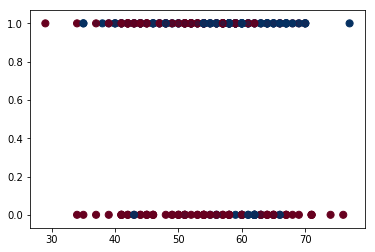

In [17]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);